Opgave1 :

1. Vurder datasættet fra rainforrest, beslut om du vil fjerne kolonner eller impute værdier, eller en blanding. Lad os se, hvad der giver det bedste resultat.

2. Del sættet op i samples og labels, så du har et datasæt, som kun består af talværdier for de enkelte træsorter.

3. Udfør en clustering med KMeans

a. Hvor mange clusters skal vi inddele den i?

b. Hvordan finder vi et godt antal?

4. Sammenhold wood mod branch i et scatterplot

5. Udfør en cross tabulation

a. Hvor gode er dine resultater?

6. Brug en StandardScaler og en Pipeline til at få bedre resultater

a. Test igen med cross tabulation

7. Check for intrinsic dimensions

a. Lav en dimensionality reduction der svarer til bedste bud

b. Blev dine resultater bedre?

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
data = pd.read_csv('input/rainforest.csv')
org_data = data

In [5]:
data = data.drop(['Unnamed: 0', 'bark'], axis=1)

In [6]:
data.head()

,dbh,wood,root,rootsk,branch,species
0,6,NaN,6.0,0.3,NaN,Acacia mabellae
1,23,353.0,135.0,13.0,35.0,Acacia mabellae
2,20,208.0,NaN,NaN,41.0,Acacia mabellae
3,23,445.0,NaN,NaN,50.0,Acacia mabellae
4,24,590.0,NaN,NaN,NaN,Acacia mabellae


In [7]:
imp = SimpleImputer(missing_values=np.nan)
data.info()
y = data['species'].values
X = data.drop('species', axis=1).values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dbh      65 non-null     int64  
 1   wood     64 non-null     float64
 2   root     13 non-null     float64
 3   rootsk   13 non-null     float64
 4   branch   43 non-null     float64
 5   species  65 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
imp.fit(X)
X = imp.transform(X)

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
model = KMeans(n_clusters=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
labels = model.predict(X_test)

print(labels)


[2 3 0 1 2 3 2 2 4 1 3 2 2 2 0 2 3 2 2 2]


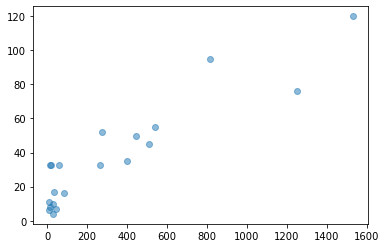

In [12]:
xs = X_test[:,1]
ys = X_test[:,4]

plt.scatter(xs, ys, alpha=0.5)
plt.show() 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data = data.drop('species', axis=1)
reg = LinearRegression()

In [14]:
target = pd.factorize(y)
cv_scores = cross_val_score(model, X, target[0], cv=5)

In [15]:
print(cv_scores)

[ -56602.87116588  -67600.50975681 -135199.29181488 -105766.74313037
  -88344.60922554]


In [16]:
print("Average scores: {}".format(np.mean(cv_scores)))


Average scores: -90702.80501869784


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [18]:
Scaler = StandardScaler()

steps = [('scaler', StandardScaler()),
        ('KMeans', KMeans(n_clusters=5))]

pipeline = Pipeline(steps)

km_scaled = pipeline.fit(X_train, y_train)

In [19]:
labels2 = km_scaled.predict(X_test)

In [20]:
cv_scaled = cross_val_score(km_scaled, X, target[0], cv=5)
print(cv_scaled)

[-131.62813264  -54.88471082  -11.73654261  -31.63590475  -14.10646424]


7. Check for intrinsic dimensions

a. Lav en dimensionality reduction der svarer til bedste bud

b. Blev dine resultater bedre?

In [21]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [22]:
opg7scaler = StandardScaler()

pca = PCA()

opg7pipeline = make_pipeline(opg7scaler, pca)

In [23]:
opg7pipeline.fit(X)
features = range(pca.n_components_)

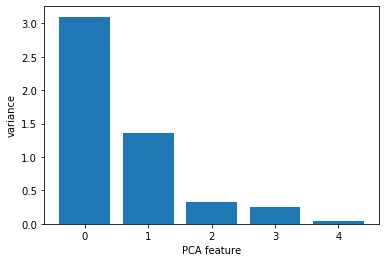

In [24]:
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [25]:
pca = PCA(n_components=2)
pca.fit(X, y)
pca_features = pca.transform(X)

In [26]:
print(pca_features.shape)

(65, 2)


In [27]:
cv_intrinsic = cross_val_score(pca, pca_features, target[0], cv=5)
print(cv_intrinsic)

[-17.35314474 -11.26442616 -10.90533978 -12.22677132 -11.24939007]
